<a href="https://colab.research.google.com/github/tin7/CodeAster_python/blob/main/Proyecto_FisiComp2022_Martin_Armoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<center>

#<font color=#FF8000>**Data filtering applied to boundary conditions in numerical simulation.**

**Martín Armoa**

Integrating Computational Project

<font color=#CC0000>Computational Physics 2022
</center>


---
<center>

**`Abstract`**

**In this work, it was proposed to design a data filter for boundary conditions in the problem of modelling and numerical simulation of materials, in particular of the moderator tank of the Atucha 1 nuclear power plant located in the province of Buenos Aires. The data provided by the company were not in a format compatible with the software used, which was time consuming and generated human errors when trying to manually find the time instants necessary for the required conditions. Code-Aster, a software for finite element analysis, numerical simulation in structural mechanics and multiphysics widely used in the nuclear industry, was used for the simulation. To solve this problem, different Python libraries were used, such as Pandas specialised in data manipulation and analysis, Numpy to perform calculations and operations, and OS to interact with the operating system. As a result, a simple and functional script was obtained that fulfilled the desired requirements.**



---
# **`INTRODUCCIÓN`**

En los últimos años, ha habido un creciente interés en la generación de energía nuclear. Especialmente en Argentina desde 2008, Nucleoeléctrica Argentina ha estado llevando a cabo un proyecto de extensión de la vida útil de la central nuclear Atucha 1 (CNA), cuyo término permitirá extender su operación durante veinticuatro años. En este contexto, en el Instituto de Física de Rosario (IFIR)  se está trabajando en la simulación y modelado de algunos materiales de la CNA, en particular con el tanque moderador. Para ello, se utiliza un software desarrollado por la empresa francesa Électricité de France (EDF) llamado CODE-ASTER, aplicado al estudio y mantenimiento de plantas y redes eléctricas. Este es un software de código abierto para el análisis por el Método de los Elementos Finitos (FEM) que se desarrolló en gran medida en Fortran y Python. Actualmente  viene integrado a un paquete llamado Salome-Meca que provee módulos de pre y post procesamiento de los datos calculados con Code-Aster.

Uno de los problemas que surgen al hacer la simulacion es cargar las condiciones de temperatura y presión para los intervalos de tiempo requeridos por la empresa a la cual está sometida la pieza simulada. Estas condiciones  se encuentran en archivos proporcionados por la empresa de manera incompatible con el software utilizado. La utilización de Python permite solucionar este problema de manera eficiente y sencilla. Con la utilizacion de distintas librerias de Python, es posible leer y escribir datos en diferentes formatos, realizar operaciones matemáticas y estadísticas en los datos, así como crear gráficos y visualizaciones para facilitar su análisis. Esto permite una gestión más eficiente de los datos y facilita el análisis de los resultados de las simulaciones.

En las siguientes secciones se describen algunas de las características de las librerías utilizadas y se muestra cómo se desarrolló la aplicación.

---
# **`ASPECTOS TEÓRICOS Y ALGORÍTMICOS`**


A continuacion se describen las características más importantes de las librerías utilizadas y  se realiza una descripción detallada de las características más relevantes de cada una de ellas y se proporcionan ejemplos concretos de su funcionamiento. 
#**Librería $\texttt{Pandas}$** 



Como herramienta principal para el desarrollo del script se analiza el potencial de la librería Pandas.
Algunas de sus características más importantes y de las cuales hacemos uso son:

- Soporte para diferentes formatos de datos: Pandas permite leer y escribir  datos en diferentes formatos, como CSV, Excel, JSON, entre otros. Esto facilita la importación y exportación de datos desde y hacia diferentes fuentes.

- Manipulación y selección de datos: Pandas permite filtrar y seleccionar los datos deseados según diferentes criterios, como valores máximos, mínimos, medios, entre otros. También se pueden eliminar o añadir filas y columnas, así como renombrarlas.
"Una de las grandes ventajas en el uso de pandas es la facilidad con que se pueden seleccionar campos o filtrar resultados." (Navone y Perren, 2022)


- Integración con otras librerías: Pandas se puede integrar con otras librerías de Python, como NumPy, Matplotlib, entre otras, lo que permite ampliar su funcionalidad.

Algunos ejemplos:

Importamos el espacio de trabajo de Google drive a donde están almacenados los archivos en uso (CE1).

In [ ]:
#CE1
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


En este ejemplo, primero leemos un archivo CSV y creamos un Data Frame con Pandas. 
Luego, utilizamos una condición para filtrar el Data Frame por valores de una columna. 


In [ ]:
#CE2
import pandas as pd

#Leemos el archivo CSV y creamos un DataFrame
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mi_archivo.csv")

#Mostramos el DataFrame Original
df

,Columna_1,Columna_2
0,1,0.0
1,2,0.5
2,3,1.0
3,4,1.5
4,5,2.0
5,6,2.5
6,7,3.0
7,8,3.5
8,9,4.0
9,10,4.5


In [ ]:
#CE3
#Filtramos el DataFrame por valores de una columna
df_filtrado1 = df[df['Columna_1'] > 10]
df_filtrado1

,Columna_1,Columna_2
10,11,5.0
11,12,5.5
12,13,6.0
13,14,6.5
14,15,7.0
15,16,7.5
16,17,8.0
17,18,8.5
18,19,9.0
19,20,9.5


También podemos combinar varios filtros con & (and) o | (or) y utilizar el método isin() para seleccionar los valores que estén incluidos en una lista (CE3).

In [ ]:
#Podemos combinar varios filtros usando & o |
df_filtrado2 = df[(df['Columna_1'] > 5) & (df['Columna_2'] < 10)]

#También podemos usar métodos de pandas como .isin()
df_filtrado2 = df[df['Columna_1'].isin([1, 3, 5])]

df_filtrado2

,Columna_1,Columna_2
0,1,0.0
2,3,1.0
4,5,2.0


Como podemos ver, es de gran utilidad a la hora de aplicar filtros de grandes cantidades de datos, como es el caso de una simulación numérica.

#**Paquete $\texttt{os}$** 
El paquete OS de Python es una colección de módulos y funciones que nos permiten interactuar con el sistema operativo desde nuestros scripts de Python. Este paquete es muy útil para realizar tareas comunes en el sistema operativo, como el manejo de archivos y carpetas.

Es una herramienta muy útil para automatizar tareas en el sistema operativo y realizar operaciones de bajo nivel en nuestros scripts.

La usamos en el código resultante para verificar si los archivos existen y para que no se sobreescriban. 

Algunos ejemplos de uso:

En CE4 se muestra una forma rápida de obtener la dirección de ruta actual en la que está operando el programa. Puede ser de utilidad cuando tenemos un programa muy extenso y necesitamos una interacción con el sistema operativo. 

In [ ]:
#CE4
import os

# Obtener la ruta del directorio actual
ruta_actual = os.getcwd()

# Mostrar la ruta actual
ruta_actual

'/content'

Dado que importamos anteriormente en CE1 el espacio de trabajo de Google Drive, obtenemos como salida dicho directorio.

Teniendo la necesidad de cambiar de directorio o cambiar, en CE5 se muestra como se resuelve sencillamente con la libreria Os.

In [ ]:
#CE5
#Crear un nuevo directorio
os.mkdir("/content/drive/MyDrive/Colab Notebooks/Nuevo_Direc")

#Cambiar de directorio
os.chdir("/content/drive/MyDrive/Colab Notebooks/Nuevo_Direc")

#Obtener la ruta del directorio actual
ruta_actual = os.getcwd()

#Mostrar la ruta actualizada
ruta_actual

'/content/drive/MyDrive/Colab Notebooks/Nuevo_Direc'

In [ ]:
#CE6
#Verificar si un archivo o directorio existe

if os.path.exists("/content/drive/MyDrive/Colab Notebooks/Nuevo_Direc/mi_archivo.csv"):
    print("El archivo existe")
else:
    print("El archivo no existe")

El archivo existe


In [ ]:
#CE7
# Obtener el tamaño de un archivo
tamanio = os.path.getsize("/content/drive/MyDrive/Colab Notebooks/Nuevo_Direc/mi_archivo.csv")
print("El tamaño del archivo es:", tamanio, "bytes")

# Obtener la última fecha de modificación de un archivo
fecha_modificacion = os.path.getmtime("/content/drive/MyDrive/Colab Notebooks/Nuevo_Direc/mi_archivo.csv")
print("El archivo fue modificado por última vez el:", fecha_modificacion)    

El tamaño del archivo es: 201 bytes
El archivo fue modificado por última vez el: 1674825097.0



#**Paquete $\texttt{NumPy}$** 

NumPy (Numerical Python) es uno de los paquetes básicos más importantes para la computación numérica en Python.
La mayoría de los paquetes computacionales que proporcionan funcionalidad científica utilizan los objetos array de NumPy.
En Numpy vamos a encontrar:
- Ndarray, un arreglo multidimensional eficiente que proporciona operaciones aritméticas rápidas orientadas a arreglos y capacidades de difusión flexibles.
"Se trata, de variables compuestas o estructuradas. Estas estructuras de datos son objetos; es decir, se trata de estructuras de datos de alto nivel que contienen métodos específicos asociados (Navone y Perren, 2022)".
- Funciones matemáticas para operaciones rápidas en matrices enteras de datos sin tener que escribir bucles.
- Herramientas para leer/escribir datos de matrices en disco y trabajar con archivos mapeados en memoria.
- Álgebra lineal, generación de números aleatorios etc.
- Una API en C para conectar NumPy con bibliotecas escritas en C, C++ o FORTRAN.

Una de las razones por las que NumPy es tan importante para los cálculos numéricos en Python es porque está diseñado para la eficiencia en grandes matrices de datos.

Se muestra un  ejemplo (CE8) para tener una idea de la mejora de rendimiento entre un array de Numpy y una lista equivalente de Python: 

In [ ]:
#CE8
import numpy as np

# Se crea un Array de Numpy
my_arr = np.arange(1000000)

# Se crea una lista de python
my_list = list(range(1000000))

Ahora multiplicamos cada objeto por 2 y vemos cuanto tiempo le lleva realizarlo:

In [ ]:
%time for _ in range(10): my_arr2 = my_arr * 2

CPU times: user 15.8 ms, sys: 6.23 ms, total: 22.1 ms
Wall time: 21.9 ms


In [ ]:
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

CPU times: user 789 ms, sys: 204 ms, total: 993 ms
Wall time: 999 ms


<font color=#EA7000>Los algoritmos basados en NumPy suelen ser de 10 a 100 veces más rápidos (o más) que sus equivalentes en Python puro.

(McKinney, W. 2018, p.85 y 124).

---
Adicionalmente, se utilizan las librerías <font color=#FF0000>**Matplotlib**</font> y <font color=#FF0000>**Seaborn**</font> con el fin de presentar imágenes de una manera que permita una mejor visualización. (Hunter, J.D.2007 y Waskom, M. L., 2021)

Como ejemplo se grafican los datos del Data Frame de CE2

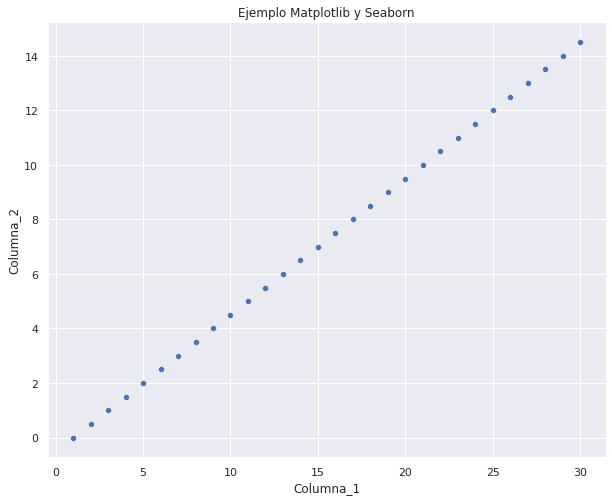

In [ ]:
#CE9
import seaborn as sns
import matplotlib.pyplot as plt

# Tamaño de la imagen 
plt.figure(figsize=(10, 8))

#Graficar Columna_1 y Columna_2 del DF
sns.scatterplot(x='Columna_1', y='Columna_2', data=df)

#Se titula la grafica
plt.title('Ejemplo Matplotlib y Seaborn')

#Se muestra la grafica
plt.show()

---

# **`Problema`**

Code-Aster es un paquete de aplicaciones, certificado por la norma ISO9000, especializado en análisis dinámico no-lineal usando elementos finitos, desarrollado para calcular y mejorar la calidad de la seguridad de las centrales nucleares de Électricité de France.

Es el núcleo de procesamiento por Elementos Finitos del paquete Salomé-Meca que le provee de una interfaz gráfica, así como módulos de pre y post procesamiento
como se puede ver en la imagen 1.






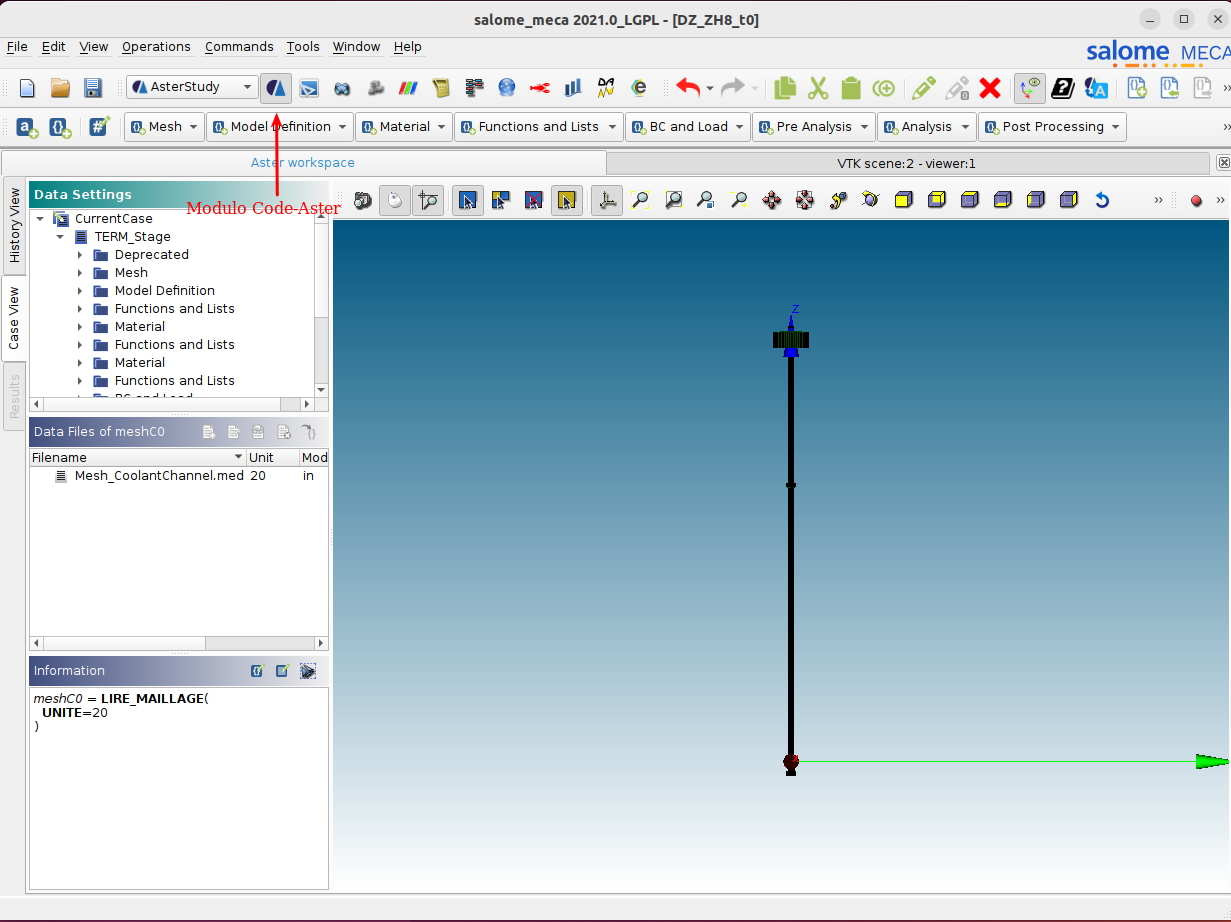

Imagen 1 - Interfaz gráfica de  Code-Aster integrado a Salome-Meca.

El problema a simular es  someter a condiciones de temperatura y presión de funcionamiento al tanque moderador de la CNA. Para ello, la empresa envía datos de la geometría  y de la temperatura y presión en función de distintos instantes de tiempo. Luego de haber realizado el mallado en el modulo de malla de Salome-Meca, se realizan cálculos mediante la resolución por elementos finitos que realiza Code-Aster dentro de Salome Meca. Una vez que se tiene definido el problema y lo que se quiere calcular, es necesario introducir las condiciones a las cuales se va a someter el objeto a simular.

Code Aster admite tablas de archivos .CVS separadas por comas sin encabezado y que se asignan a un objeto de Python como un arreglo. Esto puede hacerse de dos maneras a la hora de definir una función con dichos valores para luego utilizarlos, utilizando la interfaz gráfica importando un archivo .csv (imagen 2) o en modo texto de manera similar a cualquier editor de Python (imagen 3).



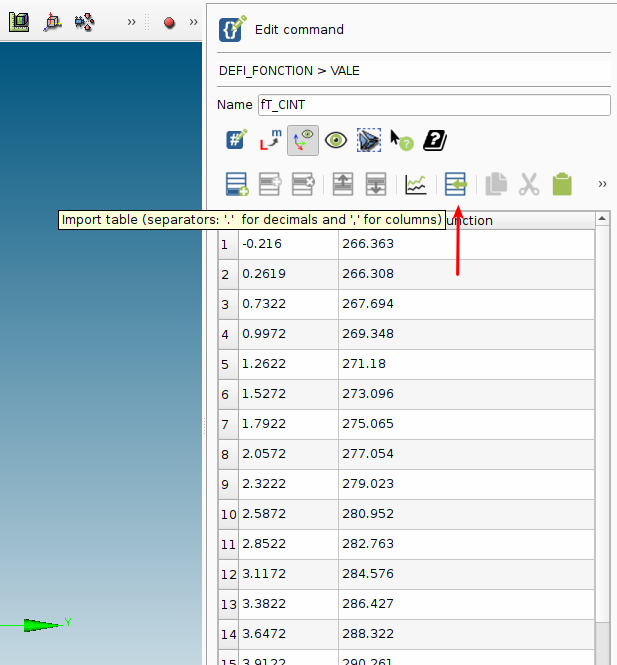

Imagen 2 - Se define una función en modo gráfico.

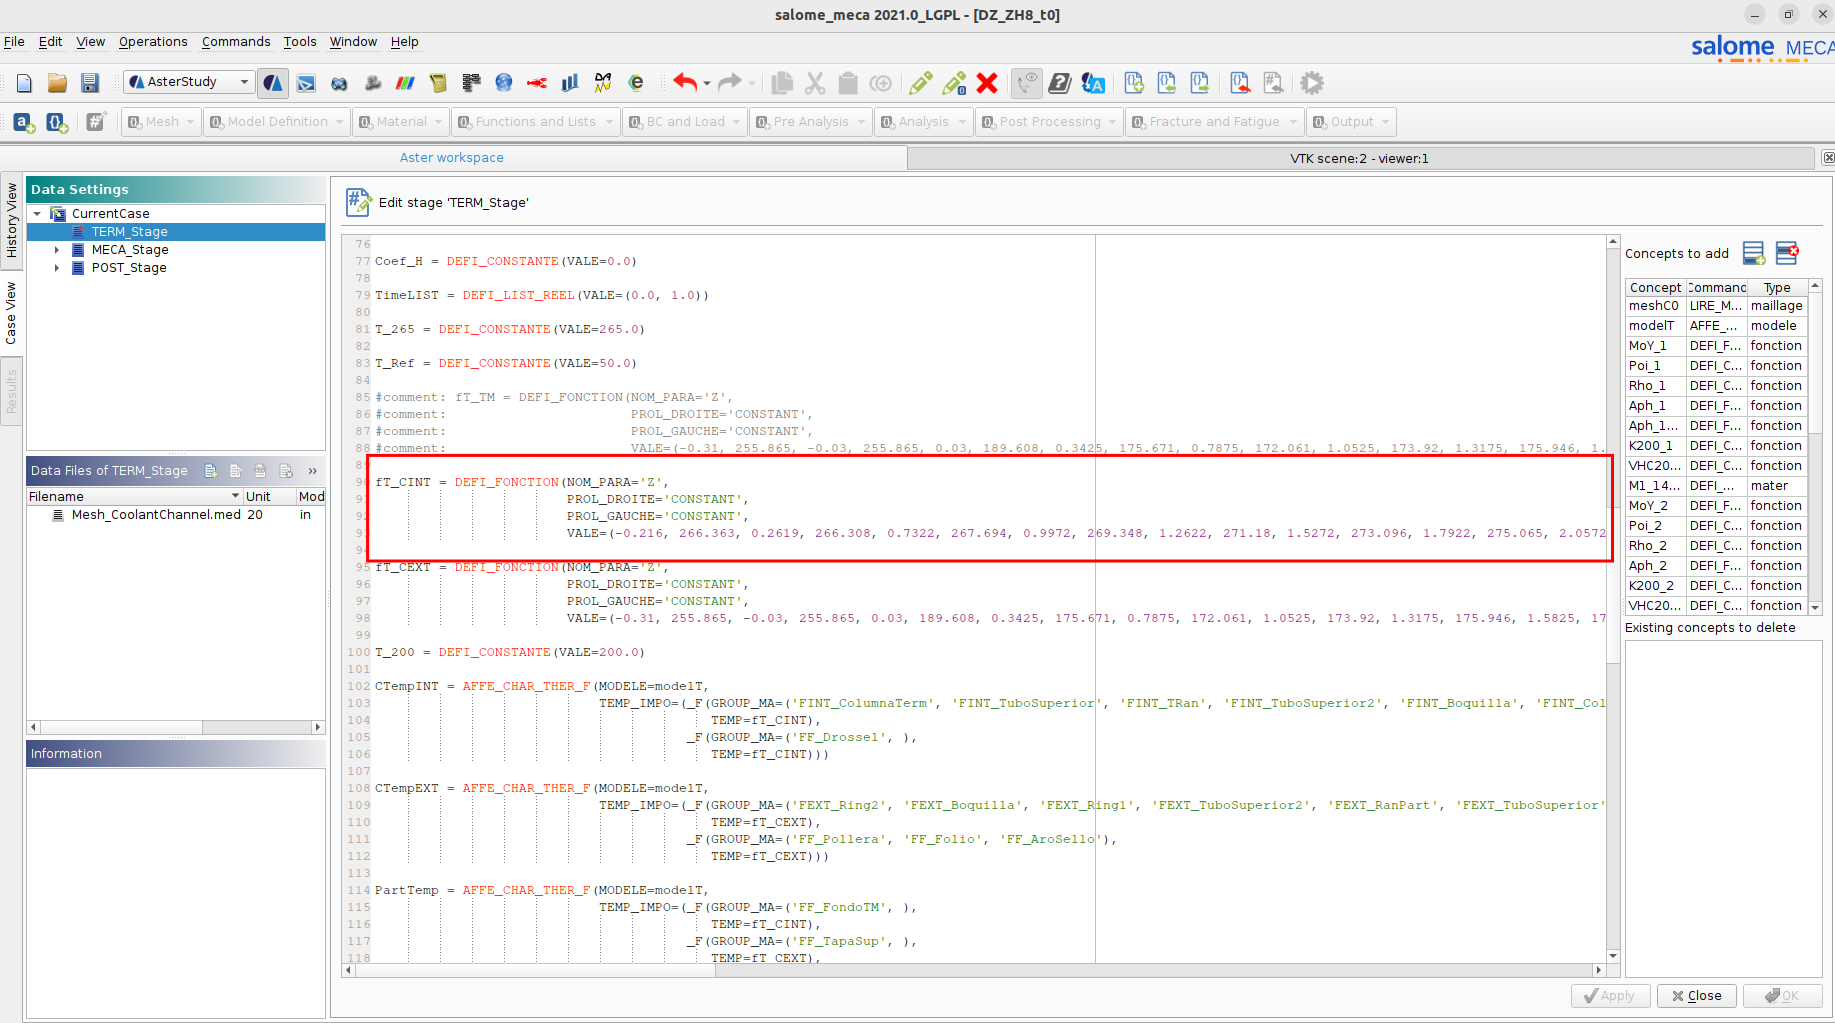

Imagen 3 - Se define una función en modo texto.

---
#**`Datos`**

Los datos en bruto enviados por la empresa no tienen un formato compatible con Code Aster, lo que dificulta su procesamiento. Por lo tanto, es necesario realizar una conversión de formato de los datos para poder utilizarlos en las simulaciones.

Además, debido a la gran cantidad de instantes de tiempo en los que se tienen datos disponibles, es necesario filtrarlos para poder llevar a cabo la simulación de manera eficiente. En este caso, el problema a simular es un problema simplificado, estacionario y lineal, por lo que no es necesario simular para todos los instantes de tiempo disponibles. En cambio, es más adecuado simular solo para aquellos instantes que se encuentran en zonas de funcionamiento críticas para la empresa.
Una vez filtrados los datos es necesario definir las funciones en el formato de trabajo de Code-Aster.
Como se puede ver en las imágenes, el modelado se hace por grupos, lo que conlleva a que cada sector tenga un nombre y una ubicación particular para todas las partes de la pieza.


A continuación, se resumen las cargas aplicadas al modelo, tal como figuran en la simulación en
Code_Aster. Luego se muestra un ejemplo de la denominación de los distintos grupos del interior y exterior del Tanque del Moderador(TM) donde se aplican dichas cargas, imagen 4 (CE10). 

Tanque Moderador
- Condiciones de sujeción.
- Temperaturas: Interior y Exterior.
- Dilatación Térmica
- Presiones: Interior y Exterior.
- Peso propio.
- Apoyo de Tapa Superior.
- Desplazamiento radial impuesto.

(Signorelli et al., 2020)

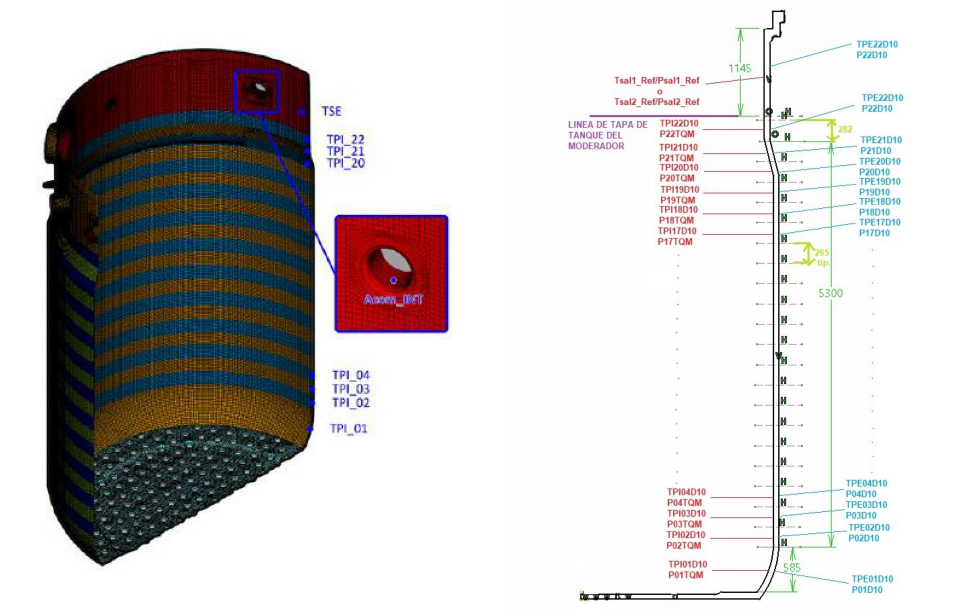

Imagen 4 - Nombre de grupos asociados al TM.


In [ ]:
#CE10
import matplotlib.pyplot as plt 
img1 = plt.imread('/content/drive/MyDrive/Colab Notebooks/TM.JPG')
img2 = plt.imread('/content/drive/MyDrive/Colab Notebooks/ubicacion.jpg')

# Se crean dos figuras
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,17))

# Se desactivan los ejes coordenados
ax1.axis('off')
ax2.axis('off')

# Se muestran las dos imágenes
ax1.imshow(img1)
ax2.imshow(img2)

#Se ajusta el espacio entre las imágenes
fig.subplots_adjust(wspace=0.1)

plt.show()
print("Imagen 4 - Nombre de grupos asociados al TM.")

Por cada nombre de grupo, se definen condiciones de temperatura y presión, las cuales definen funciones distintas como se muestra a continuación,  que son las que luego se aplican como cargas al grupo:

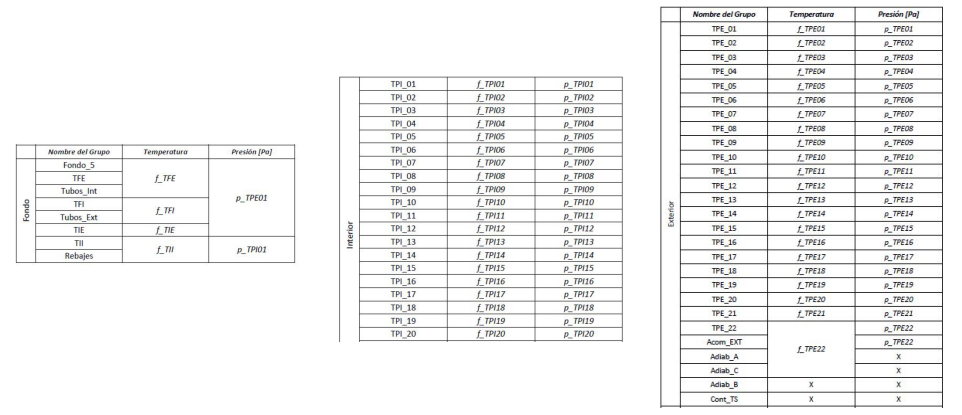

Imagen 6 - Nombre de grupos del TM


In [ ]:
#CE11
# Leer las imágenes
imag1 = plt.imread('/content/drive/MyDrive/Colab Notebooks/CBTM1.JPG')
imag2 = plt.imread('/content/drive/MyDrive/Colab Notebooks/CBTM2.JPG')
imag3 = plt.imread('/content/drive/MyDrive/Colab Notebooks/CBTM3.JPG')

# Se crean 3 figuras 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,17))

#Se desactivan los ejes
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

#Se muestran las imágenes
ax1.imshow(imag1)
ax2.imshow(imag2)
ax3.imshow(imag3)

#Se ajusta la separación entre las imágenes
fig.subplots_adjust(wspace=0.1)

plt.show()
print("Imagen 6 - Nombre de grupos del TM")

Los datos son proporcionados por la empresa en archivos .txt en el cual incluyen una columna de tiempo y luego cada nombre de grupo con sus respectivos valores en un formato separados por un espacio y puntos y comas. 

Se puede ver a continuación como es  la distribución de una de las tablas(CE10) para el grupo TP01 de la tapa(TP) del tanque moderador donde muestra los datos de temperatura interior y exterior para cada nombre de grupo:

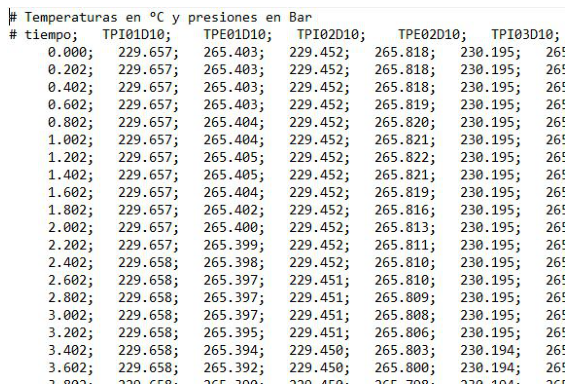

Imagen 5 - Tabla de datos dados por la empresa.


In [ ]:
#CE12

# Leer la imagen
img4 = plt.imread('/content/drive/MyDrive/Colab Notebooks/datos.JPG')

# Se crea una figura y se muestra la imagen
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img4)

# Desactivar ejes
ax.axis('off')

# Mostrar figura
plt.show()

print("Imagen 5 - Tabla de datos dados por la empresa.")

---
# **`RESULTADOS OBTENIDOS`**

En el siguiente Script (CE 13) se importa la librería Pandas y se lee el archivo que contiene los datos de Temperaturas de la tapa (TP) del tanque y se crea un objeto Data Frame con dichos datos y se renombra la columna de "# tiempo" por "tiempo".

In [ ]:
#CE 13
import pandas as pd

#Leemos el archivo CSV o txt y creamos un DataFrame
with open("/content/drive/MyDrive/Colab Notebooks/RESA_TP_TEMP.txt", "r", encoding="utf8", errors='ignore') as infile: 
       df = pd.read_csv(infile, sep=";", skipinitialspace=1, skiprows=1,engine="python",index_col=None)

#Renombro columna de tiempo '# tiempo'
df = df.rename(columns={'# tiempo': "tiempo"})

#Se muestra el DataFrame
df

,tiempo,TPI01D10,TPE01D10,TPI02D10,TPE02D10,TPI03D10,TPE03D10,TPI04D10,TPE04D10,TPI05D10,...,TPE18D10,TPI19D10,TPE19D10,TPI20D10,TPE20D10,TPI21D10,TPE21D10,TPI22D10,TPE22D10,Unnamed: 45
0,0.000,229.657,265.403,229.452,265.818,230.195,265.831,231.004,265.844,231.855,...,266.028,243.987,266.033,243.995,266.014,241.256,265.787,244.452,265.837,NaN
1,0.202,229.657,265.403,229.452,265.818,230.195,265.831,231.004,265.844,231.855,...,266.028,243.987,266.033,243.995,266.014,241.256,265.787,244.452,265.837,NaN
2,0.402,229.657,265.403,229.452,265.818,230.195,265.831,231.004,265.844,231.855,...,266.027,243.987,266.033,243.995,266.014,241.256,265.786,244.452,265.837,NaN
3,0.602,229.657,265.403,229.452,265.819,230.195,265.831,231.004,265.844,231.855,...,266.027,243.987,266.033,243.995,266.014,241.256,265.786,244.452,265.837,NaN
4,0.802,229.657,265.404,229.452,265.820,230.195,265.832,231.004,265.845,231.855,...,266.028,243.987,266.034,243.995,266.014,241.256,265.787,244.452,265.838,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22696,39992.000,51.575,51.263,51.717,51.251,51.715,51.250,51.705,51.250,51.694,...,51.241,51.527,51.241,51.557,51.242,51.509,51.238,51.490,51.236,NaN
22697,39994.000,51.575,51.262,51.716,51.250,51.714,51.250,51.704,51.249,51.693,...,51.240,51.526,51.240,51.556,51.241,51.508,51.237,51.489,51.235,NaN
22698,39996.000,51.574,51.261,51.716,51.249,51.713,51.249,51.703,51.248,51.692,...,51.239,51.525,51.239,51.555,51.240,51.507,51.236,51.488,51.234,NaN
22699,39998.000,51.573,51.261,51.715,51.248,51.713,51.248,51.703,51.247,51.691,...,51.239,51.525,51.238,51.554,51.239,51.507,51.235,51.487,51.233,NaN


En la celda de ejecución**espacio**(CE12) se importa el archivo a filtrar  con las siguientes indicaciones:

- "r" significa "lectura" y especifica que el archivo se abrirá en modo de lectura.

- encoding="utf8" especifica la codificación de caracteres utilizada en el archivo. UTF-8 es una codificación de caracteres comúnmente utilizada que admite un rango amplio de caracteres y símbolos de diferentes idiomas y alfabetos.

- errors='ignore' especifica cómo manejar los errores de codificación que se puedan producir al leer el archivo. Si se establece en "ignore", los errores de codificación se ignorarán y el archivo se leerá de todos modos. Si no se especifica esta opción o se establece en "strict", se generará un error si se encuentran caracteres no válidos durante la lectura del archivo.

Luego se genera un Data Frame, la estructura fundamental de datos usada en Pandas indicándole los siguientes argumentos al comando de lectura pd.read_csv:
- infile: es la ruta del archivo CSV que se quiere leer.
- sep: es el separador de valores que se utiliza en el archivo CSV. En este caso, el separador es ";".
- skipinitialspace: indica si se deben ignorar los espacios en blanco al principio de cada línea. En este caso, se establece en 1 para ignorar dichos espacios dado que como se ve en la imagen 5 las columnas presenta un espacio antes del ";"
- skiprows: es un entero que indica el número de filas que se deben saltar al leer el archivo CSV. En este caso, se establece en 1 para saltar la primera fila que seria el titulo de los datos.
- "engine": es el motor que se utiliza para leer el archivo CSV. En este caso, se establece en "Python" para utilizar el motor de lectura de pandas.
- "index_col": es el índice de la columna que se utiliza como índice del Data Frame. En este caso, se establece en None para utilizar un índice numérico predeterminado.

(McKinney, W. 2018, p.82 , p.171)

Dado que el tiempo de simulación para cada instante de tiempo es muy alto, y dado que tratamos con un problema estacionario y lineal, la empresa solicita instantes de funcionamiento del reactor críticos.
Los instantes de tiempo (medidos en segundos) que han sido de interés, y en los cuales se han determinado resultados, son:

[0, 11, 223, 470, 550, 2490, 6980, 7100, 7570, 7770, 35000, 39700]

En CE14 podemos ver para las condiciones de temperaturas expuestas anteriormente, los instantes solicitados para realizar la simulación en una gráfica Tiempo vs. Temperatura.

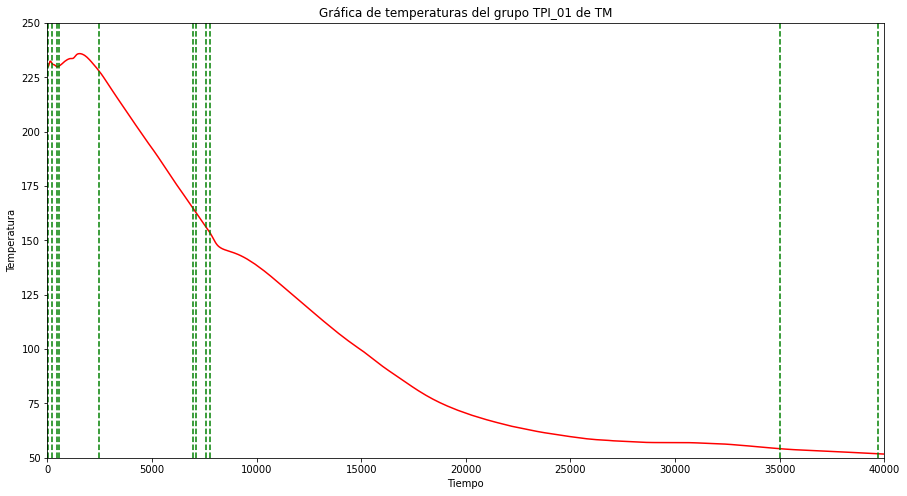

In [ ]:
#CE14
import seaborn as sns
import matplotlib.pyplot as plt


temps = [0, 11, 223, 470, 550, 2490, 6980, 7100, 7570, 7770, 35000, 39700]

# Tamaño de la imagen 
plt.figure(figsize=(15, 8))

# Crea una gráfica de línea utilizando los datos en el dataframe
sns.lineplot(x='tiempo', y='TPI03D10', data=df, color='red')

# Agrega líneas verticales en los instantes "temps"
for temp in temps:
    plt.axvline(x=temp, color='green', linestyle='--')

# Reescalar ejes x e y
plt.gca().set_xlim(0, 40000)
plt.gca().set_ylim(50, 250)

# Se etiquetan los ejes y se titula
plt.xlabel('Tiempo')
plt.ylabel('Temperatura')
plt.title('Gráfica de temperaturas del grupo TPI_01 de TM')

plt.show()

Los instantes INST = [0, 11, 223, 470, 550, 2490, 6980, 7100, 7570, 7770, 35000, 39700] pueden no coincidir exactamente con los instantes de la tabla, por lo tanto, se hace uso de la librería NumPy para buscar si no están, los más cercanos calculando las diferencias con los demás puntos de la columna y quedándose con el de menor valor.



In [ ]:
#CE15
import numpy as np

#Definimos la lista de valores a filtrar
INST = [0, 11, 223, 470, 550, 2490, 6980, 7100, 7570, 7770, 35000, 39700]

#Se crea una copia del DataFrame original
filtered_df = df.copy()

#Se recorre cada elemento de la lista 'INST
for t in INST:
    # Si el valor no se encuentra en la columna 'tiempo'
    if not t in df['tiempo'].values:
        # Calcula la diferencia entre el valor de interés y cada elemento de la columna 'tiempo'
        diff = np.abs(df['tiempo'].values - t)
        # Encuentra el índice del elemento más cercano
        idx = np.argmin(diff)
        # Reemplaza el valor de interés por el valor más cercano
        INST[INST.index(t)] = df.iloc[idx]['tiempo']

#Se filtra la columna 'tiempo' en función de la lista 'INST'
filtered_df = df[df['tiempo'].isin(INST)]

#Se muestra el DataFrame Filtrado para los instantes requeridos
filtered_df

,tiempo,TPI01D10,TPE01D10,TPI02D10,TPE02D10,TPI03D10,TPE03D10,TPI04D10,TPE04D10,TPI05D10,...,TPE18D10,TPI19D10,TPE19D10,TPI20D10,TPE20D10,TPI21D10,TPE21D10,TPI22D10,TPE22D10,Unnamed: 45
0,0.000,229.657,265.403,229.452,265.818,230.195,265.831,231.004,265.844,231.855,...,266.028,243.987,266.033,243.995,266.014,241.256,265.787,244.452,265.837,NaN
55,11.002,229.675,268.071,229.415,269.511,230.179,269.546,230.995,269.579,231.846,...,269.873,243.979,269.864,243.989,269.660,241.242,269.108,244.457,269.155,NaN
423,223.012,233.662,244.850,231.046,244.710,231.394,244.712,231.793,244.714,232.225,...,244.802,237.760,244.813,238.015,244.888,231.923,244.898,237.081,244.983,NaN
670,470.005,235.876,245.660,229.736,245.750,229.846,245.753,229.976,245.757,230.128,...,245.824,232.780,245.827,233.117,245.844,225.535,245.606,227.725,245.663,NaN
750,550.014,236.720,246.404,230.056,246.481,230.115,246.483,230.178,246.485,230.253,...,246.528,232.263,246.528,232.522,246.539,225.337,246.275,226.900,246.316,NaN
2690,2490.008,228.225,220.659,227.732,220.438,227.677,220.433,227.613,220.429,227.542,...,220.369,226.363,220.368,226.886,220.409,225.460,220.468,225.190,220.466,NaN
6190,6980.002,165.346,157.212,164.551,156.983,164.468,156.978,164.392,156.974,164.309,...,156.913,163.037,156.912,163.738,156.958,161.973,157.007,161.675,157.003,NaN
6250,7100.001,163.683,155.919,162.878,155.689,162.793,155.684,162.716,155.679,162.631,...,155.616,161.415,155.615,162.115,155.661,160.420,155.709,160.133,155.706,NaN
6485,7570.001,157.210,150.048,156.395,149.747,156.311,149.740,156.236,149.733,156.154,...,149.643,154.944,149.636,155.637,149.665,153.941,149.610,153.671,149.582,NaN
6585,7770.001,154.624,143.769,153.659,143.169,153.578,143.159,153.506,143.149,153.427,...,143.036,151.964,143.026,152.612,143.049,150.516,142.924,150.105,142.862,NaN


Como se puede ver se filtraron las filas para los instantes de tiempo.
Ahora queda filtrar cada columna para dichos instantes.
Para ello se crea una lista con el nombre de las columnas para luego recorrerlas e ir guardando los datos en un archivo .csv en el directorio deseado con el nombre de cada columna que es lo que nos permite identificar los nombres de los grupos. Previamente, se comprueba que el archivo no exista para que no sea sobrescrito, para ello se hace uso de la librería OS.

In [ ]:
#CE16
import os

# Crea una lista con los nombres de las columnas
columnas = list(filtered_df.columns)

# Recorrer la lista de columnas y guarda cada una en un archivo CSV empezando desde la 2da columna
for col in columnas[1:len(columnas)-1]:
     # Comprueba si el archivo ya existe en el directorio
    if os.path.exists("/content/" + col + ".csv"):
        # Muestra mensaje de error
        print("El archivo " + col + ".csv ya existe en el directorio especificado.")
    else:
        # Guardar archivo CSV
        #filtered_df[col] = filtered_df[col].multiply(1e5) #USAR PARA PRESIONES
        filtered_df[[columnas[0], col]].to_csv("/content/" + col + ".csv", index=False)

Una parte muy importante a tener en cuenta son las unidades en las cuales están guardados los datos. Dado que estamos trabajando con temperaturas y presión, para tener una concordancia con los datos en la simulación, los datos de temperatura se escriben en Kelvin y los de presión en Mega Pascales, por lo que es necesario a los datos filtrados de las tablas de presión multiplicarlos por 1x10⁵, para ello hay que des comentar la línea:

- filtered_df[col] = filtered_df[col].multiply(1e5) 

Mostramos como queda el archivo .csv de salida en el formato deseado.

In [ ]:
#C17
# Leemos el archivo CSV o txt y creamos un DataFrame
with open("/content/TPE01D10.csv", "r", encoding="utf8", errors='ignore') as infile: 
       df = pd.read_csv(infile, sep=";",  skiprows=0 ,engine="python",index_col=None)


print(df)

     tiempo,TPE01D10
0        0.0,265.403
1     11.002,268.071
2     223.012,244.85
3     470.005,245.66
4    550.014,246.404
5   2490.008,220.659
6   6980.002,157.212
7   7100.001,155.919
8   7570.001,150.048
9   7770.001,143.769
10   35000.01,53.572
11    39700.0,51.376


Se realiza este procedimiento para todos los grupos del tanque moderados y se cargan en Code-ASter. 

Una vez obtenidos los datos filtrados, para que dicha carga no sea utilizando la interfaz gráfica cuando se define una función para los valores de temperatura para el grupo TPE01D10 por ejemplo, se buscó crear un código que defina todas las funciones utilizando el modo texto, el cual  puede utilizar la sintaxis de Python en la forma adecuada para que pueda ser leido por Code-Aster.

Las funciones en el modo texto de Code-Aster se definen de la siguiente manera (CE18):



In [ ]:
#CE18
# Definicion de la funcion para el nombre del grupo TPE_10 para la temperatura externa en Salome meca
TPE_10 = DEFI_FONCTION(NOM_PARA='INST',
                        VALE=(0.0, 229.657, 11.002, 229.675, 223.012, 233.662, 470.005, 235.87599999999998, 550.014, 236.72, 2490.008, 228.225,
                              6980.0019999999995, 165.34599999999998, 7100.001, 163.683, 7570.001, 157.21, 7770.001, 154.624, 3.500001E4, 54.135, 3.9700E4, 51.7),
                        PROL_DROITE='CONSTANT',
                        PROL_GAUCHE='CONSTANT',
                      )

NOM_PARA: Indica el nombre del parámetro (variable o coordenada X) de la función.

VALE: Indica la lista de valores que toma cada parámetro X

PROL_DROITE y PROL_GAUCHE: Definir el tipo de extrapolación de los datos fuera del rango de definición de la variable, aceptando valores como:

- CONSTANTE: para extrapolar con el último (o primer) valor de la función,
- LINEAL: para  extrapolar a lo largo del primer segmento definido (PROL_GAUCHE) o del último segmento definido (PROL_DROITE),
- EXCLUIDO: si la extrapolación de los valores fuera del campo de definición del parámetro está prohibida (en este caso, si un cálculo requiere un valor de la función fuera del campo de definición, el código se detendrá en error fatal).



Una vez obtenidos los resultados en tablas (CE17), se crea una función que transforma dichos valores en formato leible por code aster (CE18) haciendo uso de la libreria CSV para la lectura del archivo resultante. 
Para ello leemos el archivo 

In [ ]:
#CE19

#Definimos funcion para abrir archivo de Aster y transformarlo en formato Aster
import csv
def input_table_temp(table):
    
    #Lee los archivos de entrada para la simulacion y transforma a formato leible por CODE ASTER (DEFI_FONCTION)
    
    with open("/content/TPE01D10.csv", "r") as infile: 
        infile = csv.reader(infile, delimiter=",") #
        next(infile, None)  # Saltea encabezado 
        x = list(infile) # convierte en lista
    result = np.array(x).astype(float) # convierte la lista en un array de NumPy y lo convierte en tipo flotante
    bt = len(x) 
    f = [None]*bt*2
    j = 0
    for i in range(0,bt,1):
        f[j] = result[i,0]
        f[j+1] = result[i,1]
        j=2+i*2
    return f

# Se generan lso nombres de las funciones de temperatura de la pared exterior del TM
# en un arreglo
# nombre: TPEXXD10

TPE = [None]*23     
TPE[0] = "TPE01D10" 

for i in range(1,23):
    if i < 10:
        n = str(i)
        TPE[i] = "TPE0"+n+"D10" 
    else:
        n = str(i)
        TPE[i] = "TPE"+n+"D10" 
TPE

['TPE01D10',
 'TPE01D10',
 'TPE02D10',
 'TPE03D10',
 'TPE04D10',
 'TPE05D10',
 'TPE06D10',
 'TPE07D10',
 'TPE08D10',
 'TPE09D10',
 'TPE10D10',
 'TPE11D10',
 'TPE12D10',
 'TPE13D10',
 'TPE14D10',
 'TPE15D10',
 'TPE16D10',
 'TPE17D10',
 'TPE18D10',
 'TPE19D10',
 'TPE20D10',
 'TPE21D10',
 'TPE22D10']

A continuacion se le asignan los valores para cada función (CE20) dentro del modo texto de Code-Aster con el formato leible por este:

In [ ]:
#CE20
#Se inicializa i
i = 0

for el in TPE: 
    vale = input_table_temp(el)
    TPE[i] = DEFI_FONCTION(NOM_PARA='INST', 
                        PROL_DROITE='CONSTANT',
                        PROL_GAUCHE='CONSTANT',
                        VALE=(vale))
    i=i+1

Se puede ver como queda implementado el Scrip en Code-Aster CE21 para luego ver el resultado una vez corrida la simulación (CE12).

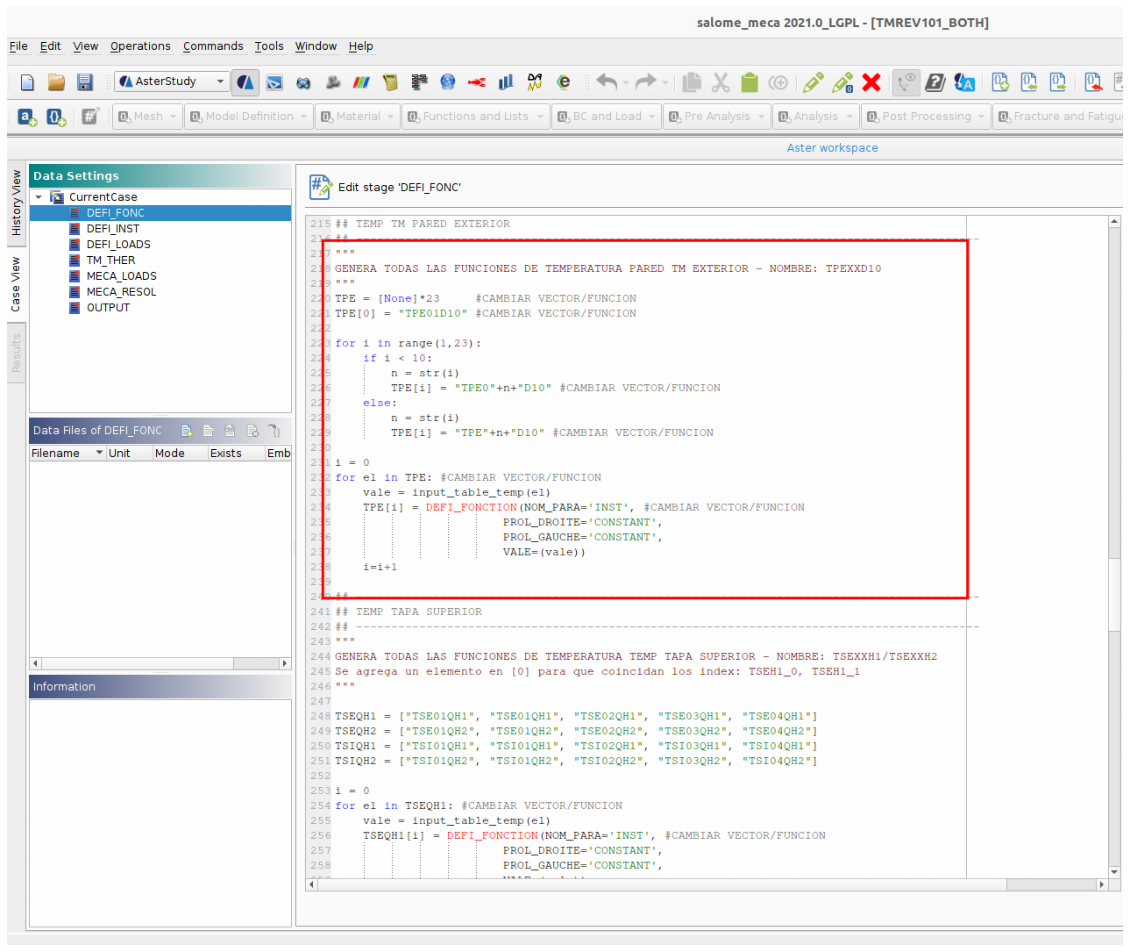

Imagen 5 - Script implementado en Code-Aster


In [ ]:
#CE21

# Leer la imagen
img5 = plt.imread('/content/drive/MyDrive/Colab Notebooks/Nuevo_Direc/result.png')

# Se crea una figura y se muestra la imagen
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(img5)

# Desactivar ejes
ax.axis('off')

# Mostrar figura
plt.show()

print("Imagen 5 - Script implementado en Code-Aster")

Como resultado se obtienen las funciones definidas para cada nombre de grupo. A continuación se muestra como ejemplo 4 de las funciones definidas por Code Aster con el Script anterior CE22 en el formato de salida adecuado.

In [ ]:
#CE22

# Commands No:  0048 Concept of the type:  fonction_sdaster
  # ------------------------------------------------------------------------------------------
  TPE01D10 = DEFI_FONCTION(NOM_PARA='INST',
                        VALE=(0.0, 229.657, 11.002, 229.675, 223.012, 233.662, 470.005, 235.87599999999998, 550.014, 236.72, 2490.008, 228.225, 6980.0019999999995, 165.34599999999998, 7100.001, 163.683, 7570.001, 157.21, 7770.001, 154.624, 3.500001E4, 54.135, 3.9700E4, 51.7),
                        PROL_DROITE='CONSTANT',
                        PROL_GAUCHE='CONSTANT',
                        NOM_RESU='TOUTRESU',
                        INTERPOL=('LIN', ),
                        VERIF='CROISSANT',
                        INFO=1,)

  # Memory (Mo):    937.20 /    933.47 /     44.29 /     22.92 (VmPeak / VmSize / Optimum / Minimum)
  # Fin orders No:  0048 user+syst:          0.00S (syst:          0.00S, Elaps:          0.00S)
  # ------------------------------------------------------------------------------------------

.. __stg1_txt211
  # ------------------------------------------------------------------------------------------
  # Commands No:  0049 Concept of the type:  fonction_sdaster
  # ------------------------------------------------------------------------------------------
  TPE02D10 = DEFI_FONCTION(NOM_PARA='INST',
                        VALE=(0.0, 229.657, 11.002, 229.675, 223.012, 233.662, 470.005, 235.87599999999998, 550.014, 236.72, 2490.008, 228.225, 6980.0019999999995, 165.34599999999998, 7100.001, 163.683, 7570.001, 157.21, 7770.001, 154.624, 3.500001E4, 54.135, 3.9700E4, 51.7),
                        PROL_DROITE='CONSTANT',
                        PROL_GAUCHE='CONSTANT',
                        NOM_RESU='TOUTRESU',
                        INTERPOL=('LIN', ),
                        VERIF='CROISSANT',
                        INFO=1,)

  # Memory (Mo):    937.20 /    933.47 /     44.29 /     22.92 (VmPeak / VmSize / Optimum / Minimum)
  # Fin orders No:  0049 user+syst:          0.00S (syst:          0.00S, Elaps:          0.00S)
  # ------------------------------------------------------------------------------------------

.. __stg1_txt211
  # ------------------------------------------------------------------------------------------
  # Commands No:  0050 Concept of the type:  fonction_sdaster
  # ------------------------------------------------------------------------------------------
  TPE03D10 = DEFI_FONCTION(NOM_PARA='INST',
                        VALE=(0.0, 229.452, 11.002, 229.415, 223.012, 231.046, 470.005, 229.736, 550.014, 230.05599999999998, 2490.008, 227.732, 6980.0019999999995, 164.551, 7100.001, 162.878, 7570.001, 156.395, 7770.001, 153.659, 3.500001E4, 54.201, 3.9700E4, 51.836000000000006),
                        PROL_DROITE='CONSTANT',
                        PROL_GAUCHE='CONSTANT',
                        NOM_RESU='TOUTRESU',
                        INTERPOL=('LIN', ),
                        VERIF='CROISSANT',
                        INFO=1,)

  # Memory (Mo):    937.20 /    933.47 /     44.29 /     22.92 (VmPeak / VmSize / Optimum / Minimum)
  # Fin orders No:  0050 user+syst:          0.00S (syst:          0.00S, Elaps:          0.00S)
  # ------------------------------------------------------------------------------------------

.. __stg1_txt211
  # ------------------------------------------------------------------------------------------
  # Commands No:  0051 Concept of the type:  fonction_sdaster
  # ------------------------------------------------------------------------------------------
  TPE04D10 = DEFI_FONCTION(NOM_PARA='INST',
                        VALE=(0.0, 230.195, 11.002, 230.179, 223.012, 231.394, 470.005, 229.84599999999998, 550.014, 230.115, 2490.008, 227.67700000000002, 6980.0019999999995, 164.468, 7100.001, 162.793, 7570.001, 156.311, 7770.001, 153.578, 3.500001E4, 54.196000000000005, 3.9700E4, 51.833),
                        PROL_DROITE='CONSTANT',
                        PROL_GAUCHE='CONSTANT',
                        NOM_RESU='TOUTRESU',
                        INTERPOL=('LIN', ),
                        VERIF='CROISSANT',
                        INFO=1,)

  # Memory (Mo):    937.20 /    933.47 /     44.29 /     22.92 (VmPeak / VmSize / Optimum / Minimum)
  # Fin orders No:  0051 user+syst:          0.00S (syst:          0.00S, Elaps:          0.00S)

A continuación se muestra el código completo.


In [ ]:
#Script para filtro de datos de condiciones de contorno
#para simulacion de TM CNA

#### CUANDO TENGO PRESIONES DESCOMENTAR LA linea 54 PARA MULTIPLICAR POR 1e5

import pandas as pd
import numpy as np
import os

# Leemos el archivo CSV y creamos un DataFrame
with open("/home/tincho/Desktop/adscripcion/BC_T/ESPU_BC/ESPU_TP_TEMP.txt", "r", encoding="utf8", errors='ignore') as infile: 
       df = pd.read_csv(infile, sep=";", skipinitialspace=1, skiprows=1,engine="python",index_col=None)

#Renombro columna de tiempo '# tiempo'
df = df.rename(columns={'# tiempo': "tiempo"})

# Definimos la lista de valores a filtrar
INST = [0, 11, 223, 470, 550, 2490, 6980, 7100, 7570, 7770, 35000, 39700]

# Crea una copia del DataFrame original
filtered_df = df.copy()

# Recorre cada elemento de la lista 'INST
for t in INST:
    # Si el valor no se encuentra en la columna 'tiempo'
    if not t in df['tiempo'].values:
        # Calcula la diferencia entre el valor de interés y cada elemento de la columna '# tiempo'
        diff = np.abs(df['tiempo'].values - t)
        # Encuentra el índice del elemento más cercano
        idx = np.argmin(diff)
        # Reemplaza el valor de interés por el valor más cercano
        INST[INST.index(t)] = df.iloc[idx]['tiempo']

# Filtra la columna 'tiempo' en función de la lista 'INST'
filtered_df = df[df['tiempo'].isin(INST)]

filtered_df

# Crear una lista con los nombres de las columnas
columnas = list(filtered_df.columns)


# Recorrer la lista de columnas y guardar cada una en un archivo CSV empezando desde la 2da columna
for col in columnas[1:len(columnas)-1]:
     # Comprobar si el archivo ya existe en el directorio
    if os.path.exists("/home/tincho/Desktop/adscripcion/BC_T/RESA_BC/RUN_DATA/" + col + ".csv"):
        # Mostrar mensaje de error
        print("El archivo " + col + ".csv ya existe en el directorio especificado.")
    else:
        # Guardar archivo CSV
        #filtered_df[col] = filtered_df[col].multiply(1e5) #USAR PARA PRESIONES
        filtered_df[[columnas[0], col]].to_csv("/home/tincho/Desktop/adscripcion/BC_T/RESA_BC/RUN_DATA/" + col + ".csv", index=False)



#Definimos funcion para abrir archivo de aster y transformarlo en CSV
import csv
def input_table_temp(table):
    """
    Lee los archivos de entrada para la simulacion y transforma a formato leible por CODE ASTER (DEFI_FONCTION)
    """
    with open("/content/"+table+".csv", "r") as infile: 
        infile = csv.reader(infile, delimiter=",") #
        next(infile, None)  # skip the headers
        x = list(infile) # convierte en type List
    result = np.array(x).astype(float)
    bt = len(x)
    f = [None]*bt*2
    j = 0
    for i in range(0,bt,1):
        f[j] = result[i,0]
        f[j+1] = result[i,1]
        j=2+i*2
    return f



# Se generan todas las funciones de temperatura de la pared exterior del TM
# nombre: TPEXXD10


TPE = [None]*23     
TPE[0] = "TPE01D10" 

for i in range(1,23):
    if i < 10:
        n = str(i)
        TPE[i] = "TPE0"+n+"D10" 
    else:
        n = str(i)
        TPE[i] = "TPE"+n+"D10" 

i = 0
for el in TPE: 
    vale = input_table_temp(el)
    TPE[i] = DEFI_FONCTION(NOM_PARA='INST', 
                        PROL_DROITE='CONSTANT',
                        PROL_GAUCHE='CONSTANT',
                        VALE=(vale))
    i=i+1

---
# **`CONCLUSIONES`**

La utilización de las librerías de Python, Pandas, os y NumPy resultó ser muy beneficiosa para el desarrollo de un script de filtrado de datos de condiciones iniciales para la simulación y modelado de materiales de la CNA1 asi como tambien para hacer un acople entre Python y Code-Aster a la hora de definir funciones en este. El uso de estas librerías permitió manipular y analizar los datos de manera rápida y eficiente, y generar tablas filtradas en formato .csv o .txt que cumplieron con los requisitos necesarios para el proyecto.

La flexibilidad y sencillez de uso de Pandas fue especialmente importante para el desarrollo del script, ya que esta librería permite leer y escribir datos en diferentes formatos, filtrar y seleccionar los datos de manera sencilla e integrarse con otras librerías como NumPy y Matplotlib. Además, el uso de la librería Os permitió la manipulación de directorios y el conocimiento de rutas de archivo, mientras que NumPy nos brindó métodos para realizar cálculos y operaciones de manera ágil y sencilla.







 

---
# **`REFERENCIAS`**

* Courtois, M. (2019), Code-Aster U4.31.02 v14. https://bit.ly/3HQH1nX 
* Hunter, J.D.(2007). "Matplotlib: A 2D Graphics Environment," in Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95, https://doi.org/10.1109/MCSE.2007.55.
* Navone, H., & Perren, G. (2022). Cuaderno de trabajo N° 11: Archivos y Bases de Datos. https://bit.ly/3HLfggq
* McKinney, W. (2013). Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython. http://bit.ly/3XAyomB
* Signorelli et al. (2020). Modelado Termoelástico del Tanque Moderador de CNA1 en Transitorio:RESA. Rosario: Instituto de Física Rosario
* The pandas development team. (s.f.). Pandas: Powerful data structures for data analysis and manipulation. https://pandas.pydata.org/
* Waskom, M. L., (2021). seaborn: statistical data visualization. Journal of Open Source Software, 6(60), 3021, https://doi.org/10.21105/joss.03021

 







---

